<h1><center>Dimention Reduction and Clustering; Market Segementation For Loan in Home Credit Card</center></h1>

## Description of the Project

__This project is created to make clustering for loans to clients by lenders. Based on the data that is collected from Kaggle Home Creadit Default risk, client history data will be used to predict the amount of loan that will be given to old or new clients  in the future. The history client data will be made in several group in clustering. This clustering can be useful to check similarities or difference of credit client in the future. It can be usefule for market segmentattion for client who want to loan some money in the company. The project will use two algorithms in unsupervised learning; dimension reduction and clustering__




## Structure of the data

__link of the data: https://www.kaggle.com/c/home-credit-default-risk/data__

__The data basically collected from mant different Credit Bureau and Home Credit Company. In this project we will several data for the project__

- #### __Application__
The main data of the table, including id and history of client.

- #### __Bureau__
All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

- #### __POS Cash Balance__
Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

- #### __Previous Application__
All previous applications for Home Credit loans of clients who have loans in our sample.

- #### __Installments Payments__
Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

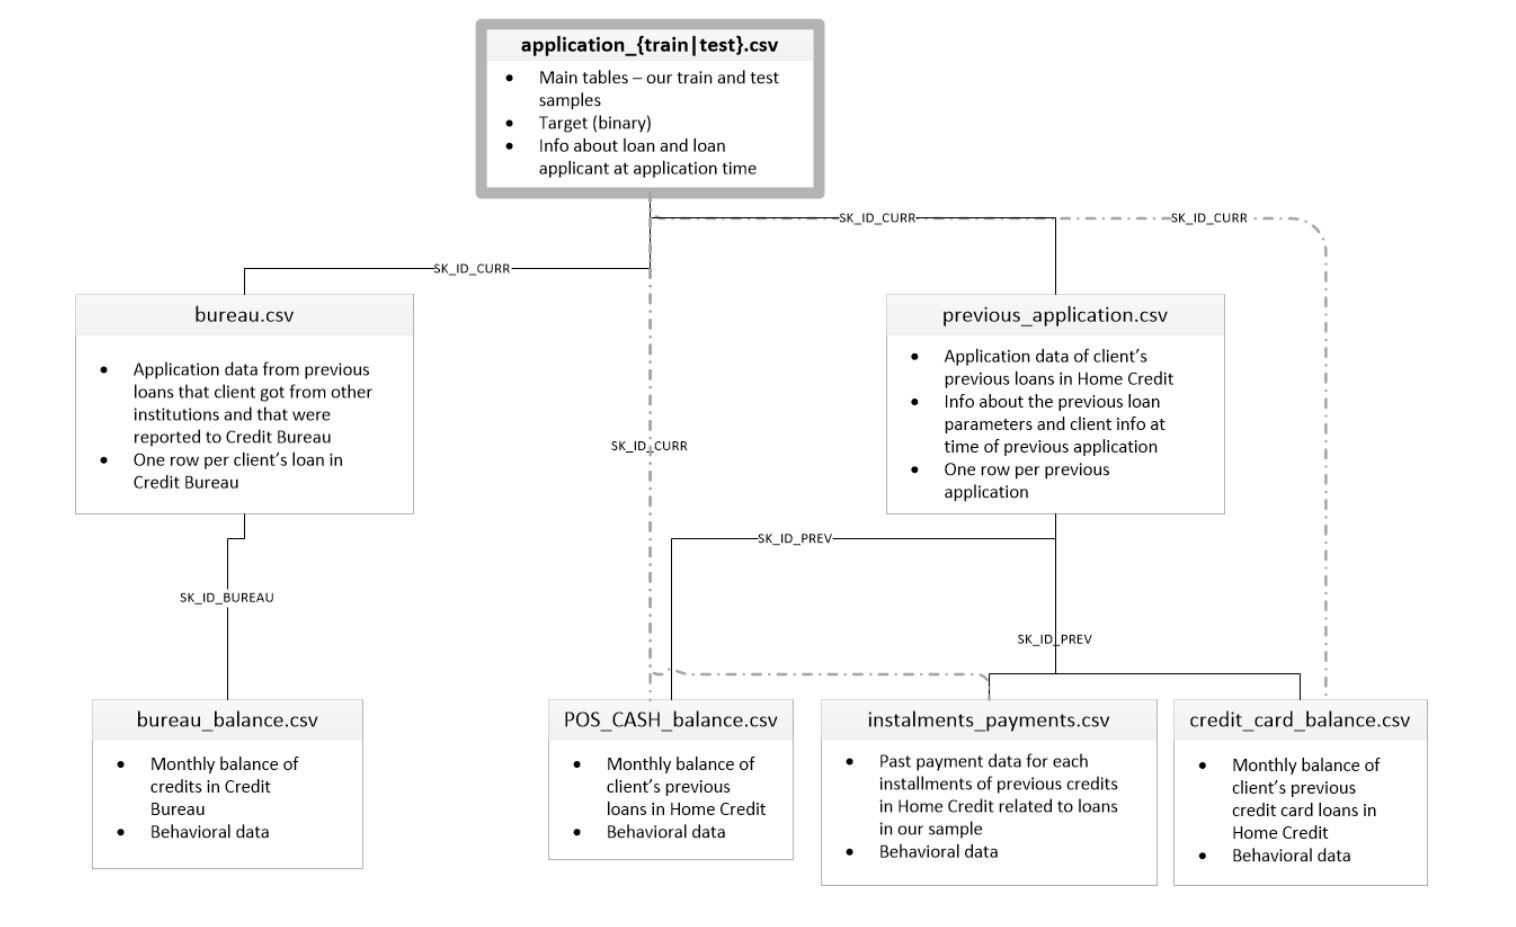)

![Logo HCI](https://thumbor.forbes.com/thumbor/fit-in/x/https://www.forbes.com/advisor/wp-content/uploads/2021/05/The_5_Cs_of_Credit-1.jpeg)

# Project overview

__In this case, we will use 5 C'S of Credit concept to process the data and find natural clusters(groups) if they exist in the data__ 

### 5 C'S of Credit Concept

__This concept take it 5 measurement to gauge the creditworthiness of potential borrowers, including character, capacity, capital, collateral, and conditions__

###### Character
- Character relates to a borrower's credit history, which is their reputation or track record for repaying loans. This information shows on the credit records of the borrower. These reports also include information on collection accounts and bankruptcies, with the majority of data being kept for seven to ten years. For this project we will take some data that can represent this measurement.

    - CREDIT_ACTIVE: This data explained the status of the Credit Bureau (CB) reported credits,
    - CREDIT_DAY_OVERDUE: This is the data explained number of days past due on CB credit at the time of application for related loan in our sample,
    - CNT_CREDIT_PROLONG: It is explained how many times was the Credit Bureau credit prolonged from clients,
    - AMT_CREDIT_SUM_OVERDUE: Current amount overdue on Credit Bureau credit.
    - AMT_CREDIT_SUM_DEBT: Current debt on Credit Bureau credit.
    - SK_DPD: (days past due) during the month of previous credit.
    - NAME_CONTRACT_STATUS: It is explained the status of client, whether they are approved, canceled, refused or unused offer


###### Capacity

- By comparing income to recurrent obligations and calculating the borrower's debt-to-income (DTI) ratio, capacity determines a borrower's ability to repay a loan. Lenders compute DTI by dividing a borrower's gross monthly income by the sum of the borrower's total monthly debt payments. The lower an applicant's DTI, the more likely they are to be approved for a new loan. For this project we will take some data that can represent this measurement.

  - AMT_INCOME_TOTAL: This data is the income of the client. 
  - AMT_CREDIT: This is Credit amount of the loan.
  - AMT_ANNUITY: This is the data of loan annuity,
  
  
###### Capital

- Lenders also take into account any money invested into a possible investment by the borrower. The likelihood of default is reduced when the borrower contributes a significant amount. Borrowers who can make a down payment are more likely to secure a loan. Better rates and terms are obtained with higher down payments. For this project we will take some data that can represent this measurement.

  - AMT_INCOME_TOTAL: This data is the income of the client. 
  - AMT_CREDIT: This is Credit amount of the loan.
  - AMT_ANNUITY: This is the data of loan annuity.
  
  
###### Collateral

- Borrowers can use collateral to help them acquire loans. It ensures the lender that if the borrower fails on the loan, the lender will be able to recover some of the loan's value by repossessing the collateral. For this project we will take some data that can represent this measurement.
    - FLAG_OWN_REALTY: This data explained whether the client has a house or not
    - FLAG_OWN_CAR: Check if the client has car or not
    - OWN_CAR_AGE: It is the data of age of the car
    - NAME_HOUSING_TYPE: It is explained whether the client live in apartment, with parent, or own house, etc
    
    
###### Conditions

- It is related to income, lenders consider the length of time an applicant has worked at their present employment and the applicant's prospective job security. In addition, conditions might refer to how the money will be used by the borrower. Consider a borrower seeking a vehicle loan or a loan for house improvements. Because of the precise aim of those loans, lenders may be more inclined to accept them than a signature loan, which might be used for anything.
    - NAME_CASH_LOAN_PURPOSE: Describing the purpose of the client loan.
    - DAYS_EMPLOYED: How many days before the application the person started current employment
    

    

# Step of the project

1. Collecting the data from kaggle 
2. Preprocessing (Encoding the categorical data,handling the missing values, Scalling the data) 
3. Reduces the computational complexity using Machine Learning.
4. Try use some clustering

# Dataset and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


data_test = pd.read_csv(r'C:\Users\ASUS ROG\Study Python\Unsupervised Learning\Project\Dimension Reduction and Clustering\data\application_test.csv')
data_train = pd.read_csv(r'C:\Users\ASUS ROG\Study Python\Unsupervised Learning\Project\Dimension Reduction and Clustering\data\application_train.csv')
data_bureau = pd.read_csv(r'C:\Users\ASUS ROG\Study Python\Unsupervised Learning\Project\Dimension Reduction and Clustering\data\bureau.csv')
data_installments_payments =  pd.read_csv(r'C:\Users\ASUS ROG\Study Python\Unsupervised Learning\Project\Dimension Reduction and Clustering\data\installments_payments.csv')
data_pos_cash_balance = pd.read_csv(r'C:\Users\ASUS ROG\Study Python\Unsupervised Learning\Project\Dimension Reduction and Clustering\data\POS_CASH_balance.csv')
data_previous_application = pd.read_csv(r'C:\Users\ASUS ROG\Study Python\Unsupervised Learning\Project\Dimension Reduction and Clustering\data\previous_application.csv')


## Character Measurement

__here, we are using, some spesific data from the excel to represent the Character of every ID__

In [2]:
data_bureau_char = data_bureau.set_index(['SK_ID_BUREAU']).sort_values(by='SK_ID_CURR')
data_bureau_char = data_bureau_char.loc[:,['SK_ID_CURR','CREDIT_ACTIVE','CREDIT_DAY_OVERDUE','CNT_CREDIT_PROLONG','AMT_CREDIT_SUM_OVERDUE','AMT_CREDIT_SUM_DEBT']]
data_bureau_char 

,SK_ID_CURR,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT
SK_ID_BUREAU,,,,,,
5896633,100001,Closed,0,0,0.0,0.0
5896631,100001,Closed,0,0,0.0,0.0
5896636,100001,Active,0,0,0.0,110281.5
5896635,100001,Active,0,0,0.0,373239.0
5896632,100001,Closed,0,0,0.0,0.0
...,...,...,...,...,...,...
5126337,456255,Closed,0,0,0.0,NaN
5126336,456255,Closed,0,1,0.0,NaN
5126328,456255,Closed,0,0,0.0,0.0


__Doing encoding the categorical data using One Hot Encoder. In this variable, CREDIT_ACTIVE has categorical data divided by ACTIVE_CREDIT,BAD DEBT_CREDIT,CLOSED_CREDIT,SOLD_CREDIT__

__Because one ID can have different status, I use One Hot Encoder to make ration for their id__

In [3]:
data_bureau_1 = data_bureau_char.iloc[:,0:2]
data_bureau_1 = pd.get_dummies(data_bureau_1,columns = ['CREDIT_ACTIVE'])
data_bureau_1.rename(columns={'CREDIT_ACTIVE_Active':'ACTIVE_CREDIT','CREDIT_ACTIVE_Bad debt':'BAD DEBT_CREDIT',
                             'CREDIT_ACTIVE_Closed':'CLOSED_CREDIT','CREDIT_ACTIVE_Sold':'SOLD_CREDIT'},inplace=True)
data_bureau_1 = data_bureau_1.groupby(by='SK_ID_CURR').mean()
data_bureau_1

,ACTIVE_CREDIT,BAD DEBT_CREDIT,CLOSED_CREDIT,SOLD_CREDIT
SK_ID_CURR,,,,
100001,0.428571,0.0,0.571429,0.0
100002,0.250000,0.0,0.750000,0.0
100003,0.250000,0.0,0.750000,0.0
100004,0.000000,0.0,1.000000,0.0
100005,0.666667,0.0,0.333333,0.0
...,...,...,...,...
456249,0.153846,0.0,0.846154,0.0
456250,0.666667,0.0,0.333333,0.0
456253,0.500000,0.0,0.500000,0.0


__Based on the interview that I did with one of the employee in the home creadit, if the clients has credit overdue more than 30 days. They tend not to perceive it differently than people who are 60 days late or beyond. Based on this assumption, I process the data with different approach.__

__If you see below__
- data_bureau_size is show how many time one ID use credit card 
- data_bureau_2 is the data that show how many times one ID experience credit day overdue more than 30 days
- In this pre-processing, I make it ration between ID in terms of credit day overdue more than 30 days

In [4]:
data_bureau_size = data_bureau.groupby('SK_ID_CURR').size()
data_bureau_2 = data_bureau_size[data_bureau.loc[:,'CREDIT_DAY_OVERDUE']>30]
data_bureau_2 = data_bureau_2.groupby('SK_ID_CURR').size()/data_bureau_size 
data_bureau_2 = data_bureau_2.fillna(0)
data_bureau_2.rename('AVERAGE DPD_EACH APPLICATION',inplace=True)

SK_ID_CURR
100001    0.0
100002    0.0
100003    0.0
100004    0.0
100005    0.0
         ... 
456249    0.0
456250    0.0
456253    0.0
456254    0.0
456255    0.0
Name: AVERAGE DPD_EACH APPLICATION, Length: 305811, dtype: float64

__As we explained before CNT_CREDIT_PROLONG was the Credit Bureau credit prolonged from clients, while AMT_CREDIT_SUM_OVERDUE is  Current amount overdue on Credit Bureau credit, and AMT_CREDIT_SUM_DEBT is current debt on Credit Bureau credit. __

__Using mean for the aggregation to these variable, I assume will be good to explain the condition of these variable__

In [102]:
data_bureau_3 = data_bureau_char.iloc[:,[0,3,4,5]]
data_bureau_3 = data_bureau_3.groupby(by='SK_ID_CURR').mean()
data_bureau_3

,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT
SK_ID_CURR,,,
100001,0.000000,0.0,85240.928571
100002,0.000000,0.0,49156.200000
100003,0.000000,0.0,0.000000
100004,0.000000,0.0,0.000000
100005,0.000000,0.0,189469.500000
...,...,...,...
456249,0.000000,0.0,16307.100000
456250,0.000000,0.0,744013.365000
456253,0.000000,0.0,448958.250000


__Join the data from data_bureau for the "Character Measurement"__

In [103]:
data_bureau_character = pd.concat([data_bureau_1,data_bureau_2,data_bureau_3]
                           ,axis=1)
data_bureau_character

,ACTIVE_CREDIT,BAD DEBT_CREDIT,CLOSED_CREDIT,SOLD_CREDIT,AVERAGE DPD_EACH APPLICATION,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT
SK_ID_CURR,,,,,,,,
100001,0.428571,0.0,0.571429,0.0,0.0,0.000000,0.0,85240.928571
100002,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,49156.200000
100003,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,0.000000
100004,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000
100005,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.0,189469.500000
...,...,...,...,...,...,...,...,...
456249,0.153846,0.0,0.846154,0.0,0.0,0.000000,0.0,16307.100000
456250,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.0,744013.365000
456253,0.500000,0.0,0.500000,0.0,0.0,0.000000,0.0,448958.250000


__Basically, Variable SK_DPD is almost similar with variable CREDIT_DAY_OVERDUE. The different is the data of Variable SK_DP taken only from Home Creadit Company, while variable CREDIT_DAY_OVERDUE was taken from all of the all of the Credit Bureau__

__The processing in here same as before which we are using one hot encoder, to make it ratio of categorized data__

In [104]:
# This data is for Home Credit company regarding monthly balance

data_pos_cash_balance_char = data_pos_cash_balance.loc[:,['SK_ID_CURR','SK_DPD']]
data_pos_cash_balance_size = data_pos_cash_balance_char.groupby('SK_ID_CURR').size()


data_pos_cash_balance_1 = data_pos_cash_balance_char[data_pos_cash_balance.loc[:,'SK_DPD']>30]
data_pos_cash_balance_1 = data_pos_cash_balance_1.groupby('SK_ID_CURR').size()/data_pos_cash_balance_size 
data_pos_cash_balance_1 = data_pos_cash_balance_1.fillna(0)
data_pos_cash_balance_1.rename('AVERAGE DPD_EACH APPLICATION_HOME CREDIT',inplace = True)

SK_ID_CURR
100001    0.0
100002    0.0
100003    0.0
100004    0.0
100005    0.0
         ... 
456251    0.0
456252    0.0
456253    0.0
456254    0.0
456255    0.0
Name: AVERAGE DPD_EACH APPLICATION_HOME CREDIT, Length: 337252, dtype: float64

__To know, the charachter of ID, we will check the history their status in the home credit. This variable also very good to check whether the client has good history when they applied for loan in the previous application__

In [105]:
#This data from home credit regarding loans in the past

data_previous_application_char = data_previous_application.copy()
data_previous_application_1 = pd.get_dummies(data_previous_application_char,columns = ['NAME_CONTRACT_STATUS'])
data_previous_application_1.rename(columns={'NAME_CONTRACT_STATUS_Approved':'APPROVED_STATUS',
                                   'NAME_CONTRACT_STATUS_Canceled':'CANCELED_STATUS',
                                   'NAME_CONTRACT_STATUS_Refused':'REFUSED_STATUS',
                                   'NAME_CONTRACT_STATUS_Unused offer':'UNUSED_OFFER_STATUS'},inplace = True)

data_previous_application_1 = data_previous_application_1.iloc[:,[1,-4,-3,-2,-1]]
data_previous_application_1 = data_previous_application_1.groupby(by='SK_ID_CURR').mean()
data_previous_application_1

,APPROVED_STATUS,CANCELED_STATUS,REFUSED_STATUS,UNUSED_OFFER_STATUS
SK_ID_CURR,,,,
100001,1.00,0.0,0.00,0.0
100002,1.00,0.0,0.00,0.0
100003,1.00,0.0,0.00,0.0
100004,1.00,0.0,0.00,0.0
100005,0.50,0.5,0.00,0.0
...,...,...,...,...
456251,1.00,0.0,0.00,0.0
456252,1.00,0.0,0.00,0.0
456253,1.00,0.0,0.00,0.0


__Join all of the data from data_bureau, data_pos_cash_balance_1, and data_previous_application_1 for the "Character Measurement"__

In [106]:
data_character = pd.concat([data_bureau_character,data_pos_cash_balance_1,data_previous_application_1],axis=1)
data_character

,ACTIVE_CREDIT,BAD DEBT_CREDIT,CLOSED_CREDIT,SOLD_CREDIT,AVERAGE DPD_EACH APPLICATION,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT,AVERAGE DPD_EACH APPLICATION_HOME CREDIT,APPROVED_STATUS,CANCELED_STATUS,REFUSED_STATUS,UNUSED_OFFER_STATUS
SK_ID_CURR,,,,,,,,,,,,,
100001,0.428571,0.0,0.571429,0.0,0.0,0.000000,0.0,85240.928571,0.0,1.00,0.0,0.00,0.0
100002,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,49156.200000,0.0,1.00,0.0,0.00,0.0
100003,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.00,0.0,0.00,0.0
100004,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.00,0.0,0.00,0.0
100005,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.0,189469.500000,0.0,0.50,0.5,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.00,0.0,0.00,0.0
456252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.00,0.0,0.00,0.0
456253,0.500000,0.0,0.500000,0.0,0.0,0.000000,0.0,448958.250000,0.0,1.00,0.0,0.00,0.0


## Capacity Measurement

__here, we are using, some spesific data from the excel to represent the Capacity of every ID__

Simply, for the capacity measurement, we are dealing with Debt to Income 

![Deb to Income](https://www01.wellsfargomedia.com/assets/images/informational-graphics/illustrations-diagrams/personal/smarter-credit/diagram_DTI-infographic_197x303.png)

__In this step, we take data for amount income total and their expenditure__

In [107]:
data_application_cap = pd.concat([data_train,data_test],axis=0).sort_values(by='SK_ID_CURR')
data_application_cap = data_application_cap.loc[:,['SK_ID_CURR','AMT_INCOME_TOTAL']]
data_application_cap.set_index('SK_ID_CURR',inplace=True)
data_previous_application_cap = data_previous_application.loc[:,['SK_ID_CURR','AMT_CREDIT','AMT_ANNUITY']].sort_values(by='SK_ID_CURR')
data_previous_application_cap = data_previous_application_cap.groupby(by='SK_ID_CURR').sum()
data_cap = pd.concat([data_application_cap,data_previous_application_cap],axis=1)
data_cap 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
SK_ID_CURR,,,
100001,135000.0,23787.0,3951.000
100002,202500.0,179055.0,9251.775
100003,270000.0,1452573.0,169661.970
100004,67500.0,20106.0,5357.250
100005,99000.0,40153.5,4813.200
...,...,...,...
456251,157500.0,40455.0,6605.910
456252,72000.0,56821.5,10074.465
456253,153000.0,41251.5,9540.810


__However for the expenditure in credit card and annuity, they count in days. Therefore, I make it processing to count the variable DAYS_ENTRY_PAYMENT in terms of year. If you see the result below. It explained how many years they need to pay their expenditure__

In [108]:
data_installments_payments_cap = data_installments_payments.groupby('SK_ID_CURR').mean()
data_installments_payments_cap = data_installments_payments.groupby('SK_ID_CURR').mean()
data_installments_payments_cap = abs(data_installments_payments_cap.loc[:,'DAYS_ENTRY_PAYMENT'])/360
data_installments_payments_cap

SK_ID_CURR
100001    6.097222
100002    0.876170
100003    3.848111
100004    2.115741
100005    1.693210
            ...   
456251    0.434127
456252    6.649537
456253    6.631746
456254    0.447953
456255    1.311149
Name: DAYS_ENTRY_PAYMENT, Length: 339587, dtype: float64

In [109]:
data_cap = pd.concat([data_application_cap,data_previous_application_cap,data_installments_payments_cap],axis=1)
data_cap 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_ENTRY_PAYMENT
SK_ID_CURR,,,,
100001,135000.0,23787.0,3951.000,6.097222
100002,202500.0,179055.0,9251.775,0.876170
100003,270000.0,1452573.0,169661.970,3.848111
100004,67500.0,20106.0,5357.250,2.115741
100005,99000.0,40153.5,4813.200,1.693210
...,...,...,...,...
456251,157500.0,40455.0,6605.910,0.434127
456252,72000.0,56821.5,10074.465,6.649537
456253,153000.0,41251.5,9540.810,6.631746


__Basically, the calculation very simple, I just divided all the expenditure by the amount income. Firtsly, In term of expenditure, it will divided by the year of their ENTRY_PAYMENT variable. After that, I make it percentage of every Debt to Income__

35% or less is generally viewed as favorable, and your debt is manageable. You likely have money remaining after paying monthly bills.

36% to 49% means your DTI ratio is adequate, but you have room for improvement. Lenders might ask for other eligibility requirements.

50% or higher DTI ratio means you have limited money to save or spend. As a result, you won't likely have money to handle an unforeseen event and will have limited borrowing options.

__Nb. If you see some id has percentage more than 100 %. We can say that their expenditure is more higher than their income__

In [110]:
data_cap = pd.concat([data_application_cap,data_previous_application_cap,data_installments_payments_cap],axis=1)
data_capacity = (data_cap.iloc[:,1]/data_cap.iloc[:,3]+data_cap.iloc[:,2]/data_cap.iloc[:,3])/(data_cap.iloc[:,0]*12)*100
data_capacity.rename('capacity',inplace=True)


SK_ID_CURR
100001      0.280820
100002      8.844464
100003     13.011314
100004      1.485821
100005      2.235444
             ...    
456251      5.735638
456252      1.164380
456253      0.417155
456254     31.575475
456255    143.726762
Name: capacity, Length: 356255, dtype: float64

## Capital Measurement

__here, we are using, some spesific data from the excel to represent the Capital of every ID__

For the capital, it is very simple as we are using only RATE_DOWN_PAYMENT capital and we make aggregation based on means

In [111]:
#capital
data_capital = data_previous_application.loc[:,['SK_ID_CURR','RATE_DOWN_PAYMENT']]
data_capital = data_capital.groupby('SK_ID_CURR').mean()
data_capital

,RATE_DOWN_PAYMENT
SK_ID_CURR,
100001,0.104326
100002,0.000000
100003,0.050030
100004,0.212008
100005,0.108964
...,...
456251,0.000000
456252,0.062443
456253,0.214316


## Colleteral Measurement

__here, we are using, some spesific data from the excel to represent the Colleterall of every ID__

For the Colleteral , we are check whether the client has a house or car, age car and the status of the house.

In [112]:
data_application_col = pd.concat([data_train,data_test],axis=0).sort_values(by='SK_ID_CURR')
data_application_col = data_application_col.loc[:,['SK_ID_CURR','FLAG_OWN_CAR','OWN_CAR_AGE','FLAG_OWN_REALTY','NAME_HOUSING_TYPE']]
data_application_col.set_index('SK_ID_CURR',inplace=True)
data_application_col.replace({'N':0,'Y':1},inplace =True)
data_application_col.loc[:,'OWN_CAR_AGE'].fillna(0,inplace=True)
data_collateral = pd.get_dummies(data_application_col,columns=['NAME_HOUSING_TYPE'])
data_collateral

,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
SK_ID_CURR,,,,,,,,,
100001,0,0.0,1,0,1,0,0,0,0
100002,0,0.0,1,0,1,0,0,0,0
100003,0,0.0,0,0,1,0,0,0,0
100004,1,26.0,1,0,1,0,0,0,0
100005,0,0.0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
456251,0,0.0,0,0,0,0,0,0,1
456252,0,0.0,1,0,1,0,0,0,0
456253,0,0.0,1,0,1,0,0,0,0


## Condition Measurement

__here, we are using, some spesific data from the excel to represent the Condition of every ID__

For the  Condition, the purpose of loan and the days employed are processed same as other measurments

In [113]:
#Condition

data_previous_application_con = data_previous_application.loc[:,['SK_ID_CURR','NAME_CASH_LOAN_PURPOSE']]
data_previous_application_con = pd.get_dummies(data_previous_application_con,columns=['NAME_CASH_LOAN_PURPOSE'])
data_previous_application_con = data_previous_application_con.groupby(by='SK_ID_CURR').mean()
data_application_con = pd.concat([data_train,data_test],axis=0).sort_values(by='SK_ID_CURR').loc[:,['SK_ID_CURR','DAYS_EMPLOYED']]
data_application_con.set_index('SK_ID_CURR',inplace=True)
data_condition = pd.concat([data_previous_application_con,data_application_con],axis=1)
data_condition

,NAME_CASH_LOAN_PURPOSE_Building a house or an annex,NAME_CASH_LOAN_PURPOSE_Business development,NAME_CASH_LOAN_PURPOSE_Buying a garage,NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land,NAME_CASH_LOAN_PURPOSE_Buying a home,NAME_CASH_LOAN_PURPOSE_Buying a new car,NAME_CASH_LOAN_PURPOSE_Buying a used car,NAME_CASH_LOAN_PURPOSE_Car repairs,NAME_CASH_LOAN_PURPOSE_Education,NAME_CASH_LOAN_PURPOSE_Everyday expenses,...,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,DAYS_EMPLOYED
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-2329
100002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-637
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.666667,0.333333,-1188
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-225
100005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.500000,0.500000,-4469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-236
456252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,365243
456253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-7921


# Merging all of the 5 measurement to gauge the creditworthiness of potential borrowers, including character, capacity, capital, collateral, and conditions

In [125]:
all_data = pd.concat([data_character,data_capacity,data_capital,data_collateral,data_condition],axis=1)
all_data

,ACTIVE_CREDIT,BAD DEBT_CREDIT,CLOSED_CREDIT,SOLD_CREDIT,AVERAGE DPD_EACH APPLICATION,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT,AVERAGE DPD_EACH APPLICATION_HOME CREDIT,APPROVED_STATUS,...,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,DAYS_EMPLOYED
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.428571,0.0,0.571429,0.0,0.0,0.000000,0.0,85240.928571,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-2329
100002,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,49156.200000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-637
100003,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.666667,0.333333,-1188
100004,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-225
100005,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.0,189469.500000,0.0,0.50,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.500000,0.500000,-4469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-236
456252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,365243
456253,0.500000,0.0,0.500000,0.0,0.0,0.000000,0.0,448958.250000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-7921


__Check how many data is missing in the final all_data__

In [118]:
all_data.isna().sum()

ACTIVE_CREDIT                                              50444
BAD DEBT_CREDIT                                            50444
CLOSED_CREDIT                                              50444
SOLD_CREDIT                                                50444
AVERAGE DPD_EACH APPLICATION                               50444
CNT_CREDIT_PROLONG                                         50444
AMT_CREDIT_SUM_OVERDUE                                     50444
AMT_CREDIT_SUM_DEBT                                        58816
AVERAGE DPD_EACH APPLICATION_HOME CREDIT                   19003
APPROVED_STATUS                                            17398
CANCELED_STATUS                                            17398
REFUSED_STATUS                                             17398
UNUSED_OFFER_STATUS                                        17398
capacity                                                   18468
RATE_DOWN_PAYMENT                                          37502
FLAG_OWN_CAR             

__for handlinng missing value, we cannot use spesific value or zero or using some algorithm such as Multiple Imputation by Chained Equations. It is because in some case the ID of Client is different. Therefore, the best option to drop NaN values from all of the data__

In [126]:
final_all_data = all_data.dropna()
final_all_data

,ACTIVE_CREDIT,BAD DEBT_CREDIT,CLOSED_CREDIT,SOLD_CREDIT,AVERAGE DPD_EACH APPLICATION,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM_OVERDUE,AMT_CREDIT_SUM_DEBT,AVERAGE DPD_EACH APPLICATION_HOME CREDIT,APPROVED_STATUS,...,NAME_CASH_LOAN_PURPOSE_Other,NAME_CASH_LOAN_PURPOSE_Payments on other loans,NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment,NAME_CASH_LOAN_PURPOSE_Refusal to name the goal,NAME_CASH_LOAN_PURPOSE_Repairs,NAME_CASH_LOAN_PURPOSE_Urgent needs,NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday,NAME_CASH_LOAN_PURPOSE_XAP,NAME_CASH_LOAN_PURPOSE_XNA,DAYS_EMPLOYED
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,0.428571,0.0,0.571429,0.0,0.0,0.000000,0.0,85240.928571,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-2329
100002,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,49156.200000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-637
100003,0.250000,0.0,0.750000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.666667,0.333333,-1188
100004,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-225
100005,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.0,189469.500000,0.0,0.50,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.500000,0.500000,-4469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,0.153846,0.0,0.846154,0.0,0.0,0.000000,0.0,16307.100000,0.0,0.50,...,0.5,0.0,0.0,0.0,0.000,0.0,0.0,0.500000,0.000000,365243
456250,0.666667,0.0,0.333333,0.0,0.0,0.000000,0.0,744013.365000,0.0,0.50,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.500000,0.500000,-633
456253,0.500000,0.0,0.500000,0.0,0.0,0.000000,0.0,448958.250000,0.0,1.00,...,0.0,0.0,0.0,0.0,0.000,0.0,0.0,1.000000,0.000000,-7921


# Data Standardization

__The data has a lot different range or varying scales. Also, as we want to do dimention reduction using Principal Component Analysis, The importance of standardizing variables cannot be overstated. Because PCA provides larger weight to variables with bigger variances than to variables with extremely low variances, this is the case. In fact, the analysis' outcomes will be determined by the units of measurement employed to assess each variable. When raw values are standardized, they have the same variance, therefore variables with bigger variances aren't given as much weight.__

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(final_all_data)
scaled_data = scaler.transform(final_all_data)
scaled_data 

array([[ 0.06685464, -0.00588351, -0.05504822, ...,  0.98995189,
        -0.95816654, -0.46654914],
       [-0.52724906, -0.00588351,  0.53868179, ...,  0.98995189,
        -0.95816654, -0.45455965],
       [-0.52724906, -0.00588351,  0.53868179, ..., -0.12919234,
         0.21569017, -0.45846403],
       ...,
       [ 0.30449613, -0.00588351, -0.29254023, ...,  0.98995189,
        -0.95816654, -0.50617399],
       [-1.35899425, -0.00588351,  1.36990382, ...,  0.98995189,
        -0.95816654, -0.48395942],
       [ 0.15326973, -0.00588351, -0.14140895, ..., -0.68876445,
         0.36242226, -0.45898839]])

# Principal Component Analysis (PCA)

__It's utilized to get around the dataset's feature redundancy. It also seeks to collect important information that explains high variation, resulting in the greatest accuracy. It makes data visualizations simple to use. It reduces the model's complexity while increasing computing efficiency.__

__If you see below, the result show 0.92991792, 0.99990183. It means only less than around 0.0001 the variability of the data lost. Simply, the model of PCA is quite good in this case.__

In [149]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(final_all_data)
x_pca=pca.transform(final_all_data)
np.cumsum(pca.explained_variance_ratio_)

array([0.92991792, 0.99990183])

__Shape of the data before and after Dimention Reduction using PCA__

In [150]:
print(scaled_data.shape)
print(x_pca.shape)

(266186, 50)
(266186, 2)


Text(0, 0.5, 'Y')

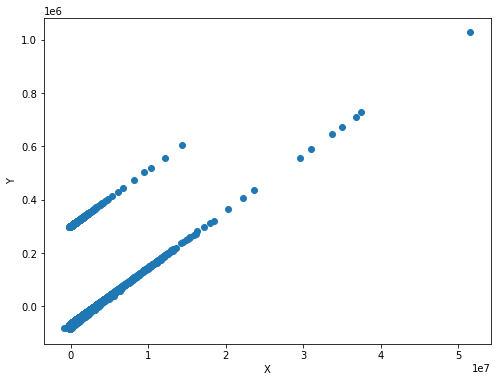

In [152]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('X')
plt.ylabel('Y')

# Clustering and Choose optimal number of clusters 

In [248]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans 
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
import scipy.stats
from sklearn import mixture


import matplotlib.pyplot as plt
from IPython import display

In [238]:
index = final_all_data.reset_index()
index = index.loc[:,'SK_ID_CURR']
pandas_x_pca = pd.DataFrame(x_pca, columns =['X','Y'])
pandas_x_pca = pd.concat([index,pandas_x_pca],axis = 1)
pandas_x_pca.set_index('SK_ID_CURR',inplace = True)
pandas_x_pca


,X,Y
SK_ID_CURR,,
100001,-70406.198669,-67345.076289
100002,-106518.639437,-66416.572446
100003,-155652.193434,-68007.001883
100004,-155672.558874,-67044.217731
100005,33844.319245,-67280.377163
...,...,...
456249,-147098.002005,298686.907112
456250,588183.040130,-51717.768049
456253,293348.038812,-65243.950456


<function matplotlib.pyplot.show(close=None, block=None)>

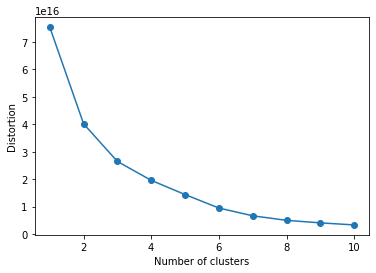

In [169]:
# calculate distortion for a range of number of cluster Using Kmeans
distortions = []
for i in range(1,11):
    cluster = KMeans(n_clusters = i )
    cluster.fit(pandas_x_pca)
    distortions.append(cluster.inertia_)
    
# plot
plt.plot(range(1,11),distortions,marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

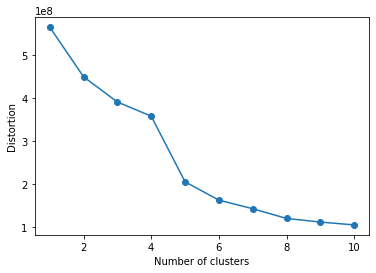

In [174]:
# calculate distortion for a range of number of cluster using PAM 
distortions = []
x_sample = pandas_x_pca.sample(frac=0.01,random_state=0)
for i in range(1,11):
    cluster = KMedoids(n_clusters = i )
    cluster.fit(x_sample)
    distortions.append(cluster.inertia_)
    
# plot
plt.plot(range(1,11),distortions,marker ='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show

In [121]:
final_all_data_sample = pandas_x_pca.sample(n=10000,random_state=0)
for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(final_all_data_sample)
    centers = clusterer.cluster_centers_

    score = silhouette_score(final_all_data_sample, preds, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8965630192718054)
For n_clusters = 3, silhouette score is 0.7462458227252659)
For n_clusters = 4, silhouette score is 0.7258626134993652)
For n_clusters = 5, silhouette score is 0.7472166091699322)
For n_clusters = 6, silhouette score is 0.7526714073134928)
For n_clusters = 7, silhouette score is 0.7530050715664094)
For n_clusters = 8, silhouette score is 0.7057377601524938)
For n_clusters = 9, silhouette score is 0.7031631106664243)
For n_clusters = 10, silhouette score is 0.6802406971255)


# Clustering using K Means

__Based on the Elbow Method and silhouette score. It is better to use two centroids for the cluster__

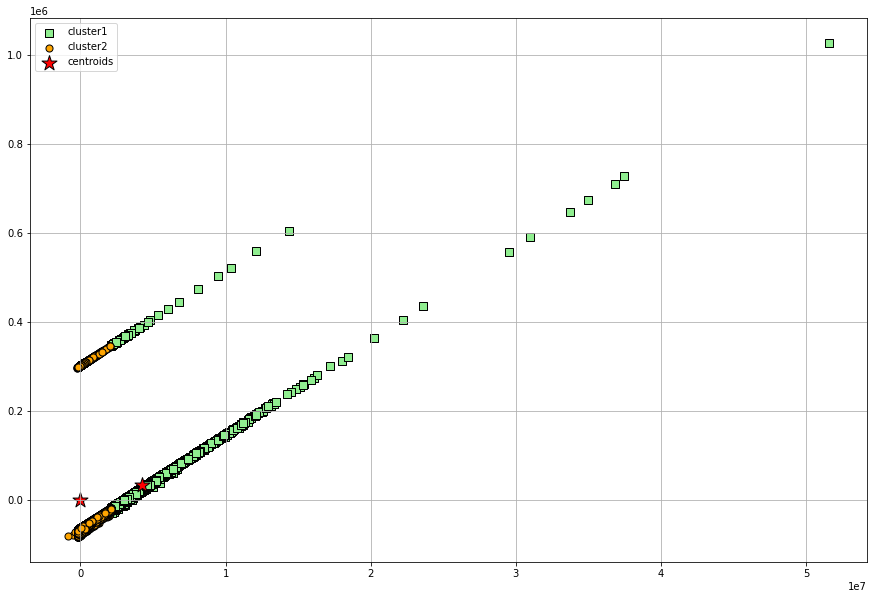

In [225]:
# For two cluster using K-MEANS Algorithm

plt.figure(figsize=(15,10))
cluster1 = KMeans(n_clusters=2 , random_state = 0)
y = cluster1.fit_predict(pandas_x_pca)

plt.scatter(pandas_x_pca.iloc[y== 0,0], pandas_x_pca.iloc[y== 0,1],
           s = 50, c = 'lightgreen', marker = 's',edgecolor = 'black',
           label = 'cluster1')

plt.scatter(pandas_x_pca.iloc[y== 1,0], pandas_x_pca.iloc[y== 1 ,1],
           s = 50, c = 'orange', marker = 'o',edgecolor = 'black',
           label = 'cluster2')

# plot the centroids
plt.scatter(cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:,1],
           s =250,marker ='*', c ='red', edgecolor ='black',
           label = 'centroids')

result_centroids_coordinates = cluster1.cluster_centers_[:, 0], cluster1.cluster_centers_[:,1]

plt.legend(scatterpoints = 1)
plt.grid()
plt.show()

# Clustering using Gaussian Mixture

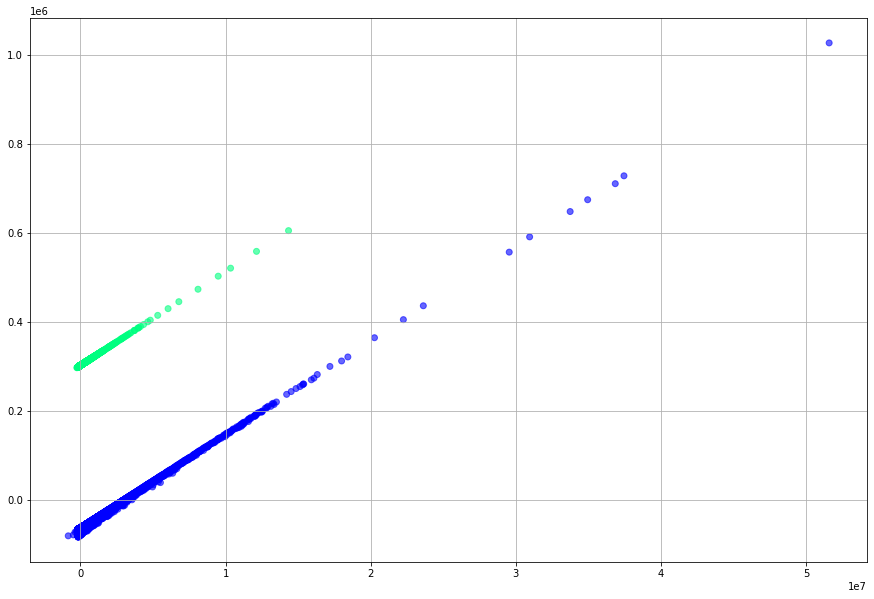

In [366]:
# For two cluster using K-MEANS Algorithm

plt.figure(figsize=(15,10))
gmm = GaussianMixture(n_components=2)
gmm.fit(pandas_x_pca)


# Visualizing the clustering 
plt.scatter(pandas_x_pca['X'], pandas_x_pca['Y'],  
           c = GaussianMixture(n_components = 2).fit_predict(pandas_x_pca), cmap =plt.cm.winter, alpha = 0.6) 


plt.grid()
plt.show()

# Check Characteristic of Clustering

In [361]:
pandas_x_pca_new = pandas_x_pca.copy()
pandas_x_pca_new['Group of Cluster'] = y
pandas_x_pca_new

,X,Y,Group of Cluster
SK_ID_CURR,,,
100001,-70406.198669,-67345.076289,1
100002,-106518.639437,-66416.572446,1
100003,-155652.193434,-68007.001883,1
100004,-155672.558874,-67044.217731,1
100005,33844.319245,-67280.377163,1
...,...,...,...
456249,-147098.002005,298686.907112,1
456250,588183.040130,-51717.768049,1
456253,293348.038812,-65243.950456,1


__Here, You can check, it is the characteristic of first clustering when we invers back to our data. Here if the next data near to this variable, it will enter cluster 1__

In [362]:
pandas_x_pca_new_0 = pandas_x_pca_new[pandas_x_pca_new.loc[:,'Group of Cluster'] == 0]
pandas_x_pca_new_0_mean = pandas_x_pca_new_0.mean()
array_mean_group_1 = pandas_x_pca_new_0_mean[:2].to_numpy()
array_mean_group_1 

array([4256877.39893097,   33891.91886554])

In [363]:
group_1 = pca.inverse_transform(array_mean_group_1)
group_1 

array([ 9.11866944e-01, -7.57919557e-06,  8.20426109e-02,  6.09802476e-03,
        1.86846988e-04,  6.13457088e-03,  2.67721774e+02,  4.41369771e+06,
        3.64546630e-03,  7.73284507e-01,  1.08553061e-01,  1.12622528e-01,
        5.53990353e-03,  2.16989338e+01,  9.48893826e-02,  6.11761070e-01,
        5.03663894e+00,  7.37490733e-01,  2.21915609e-03,  9.14649428e-01,
        2.64952557e-02,  1.18764542e-02,  1.34027346e-02,  3.13569711e-02,
        1.65232082e-03,  3.40674621e-04,  6.82849809e-05,  2.30467256e-04,
        4.95501259e-04,  8.02631597e-04,  1.22412740e-03,  1.81757585e-04,
        4.90460767e-04,  1.14607289e-03,  1.56776806e-04,  7.27688468e-05,
        2.34557312e-05,  8.78409652e-04,  2.53309066e-04, -3.39515409e-06,
        6.63898889e-03,  7.45352956e-04,  5.72751094e-04, -1.60050359e-06,
        1.00343874e-02,  2.33636491e-03,  3.51187092e-04,  7.30165382e-01,
        2.41143562e-01,  7.37221593e+03])

In [374]:
pd.DataFrame(group_1,index=['ACTIVE_CREDIT', 'BAD DEBT_CREDIT', 'CLOSED_CREDIT', 'SOLD_CREDIT',
       'AVERAGE DPD_EACH APPLICATION', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
       'AVERAGE DPD_EACH APPLICATION_HOME CREDIT', 'APPROVED_STATUS',
       'CANCELED_STATUS', 'REFUSED_STATUS', 'UNUSED_OFFER_STATUS', 'capacity',
       'RATE_DOWN_PAYMENT', 'FLAG_OWN_CAR', 'OWN_CAR_AGE', 'FLAG_OWN_REALTY',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_CASH_LOAN_PURPOSE_Building a house or an annex',
       'NAME_CASH_LOAN_PURPOSE_Business development',
       'NAME_CASH_LOAN_PURPOSE_Buying a garage',
       'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
       'NAME_CASH_LOAN_PURPOSE_Buying a home',
       'NAME_CASH_LOAN_PURPOSE_Buying a new car',
       'NAME_CASH_LOAN_PURPOSE_Buying a used car',
       'NAME_CASH_LOAN_PURPOSE_Car repairs',
       'NAME_CASH_LOAN_PURPOSE_Education',
       'NAME_CASH_LOAN_PURPOSE_Everyday expenses',
       'NAME_CASH_LOAN_PURPOSE_Furniture',
       'NAME_CASH_LOAN_PURPOSE_Gasification / water supply',
       'NAME_CASH_LOAN_PURPOSE_Hobby', 'NAME_CASH_LOAN_PURPOSE_Journey',
       'NAME_CASH_LOAN_PURPOSE_Medicine',
       'NAME_CASH_LOAN_PURPOSE_Money for a third person',
       'NAME_CASH_LOAN_PURPOSE_Other',
       'NAME_CASH_LOAN_PURPOSE_Payments on other loans',
       'NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment',
       'NAME_CASH_LOAN_PURPOSE_Refusal to name the goal',
       'NAME_CASH_LOAN_PURPOSE_Repairs', 'NAME_CASH_LOAN_PURPOSE_Urgent needs',
       'NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday',
       'NAME_CASH_LOAN_PURPOSE_XAP', 'NAME_CASH_LOAN_PURPOSE_XNA',
       'DAYS_EMPLOYED'],columns = ['First Cluster'])

,First Cluster
ACTIVE_CREDIT,9.118669e-01
BAD DEBT_CREDIT,-7.579196e-06
CLOSED_CREDIT,8.204261e-02
SOLD_CREDIT,6.098025e-03
AVERAGE DPD_EACH APPLICATION,1.868470e-04
CNT_CREDIT_PROLONG,6.134571e-03
AMT_CREDIT_SUM_OVERDUE,2.677218e+02
AMT_CREDIT_SUM_DEBT,4.413698e+06
AVERAGE DPD_EACH APPLICATION_HOME CREDIT,3.645466e-03
APPROVED_STATUS,7.732845e-01


__Here, You can check, it is the characteristic of second clustering when we invers back to our data. Here if the next data near to this variable, it will enter cluster 1__

In [376]:
pandas_x_pca_new_2 = pandas_x_pca_new[pandas_x_pca_new.loc[:,'Group of Cluster'] == 1]
pandas_x_pca_new_2_mean = pandas_x_pca_new_2.mean()
array_mean_group_2 = pandas_x_pca_new_2_mean[:2].to_numpy()
group_2 = pca.inverse_transform(array_mean_group_2)
group_2  

array([4.04804055e-01, 1.50249405e-05, 5.91676290e-01, 3.50463044e-03,
       3.45492890e-04, 6.54938421e-03, 4.65874101e+01, 1.25999553e+05,
       6.05552615e-03, 7.46935457e-01, 1.23505541e-01, 1.12456138e-01,
       1.71028640e-02, 2.88319756e+01, 8.17958450e-02, 3.47601680e-01,
       4.26225265e+00, 7.01144782e-01, 3.68473790e-03, 8.90949587e-01,
       3.51774294e-02, 8.61696598e-03, 1.49594696e-02, 4.66118103e-02,
       8.10435344e-04, 1.16540587e-04, 4.52892065e-05, 1.69483414e-04,
       2.80620619e-04, 3.03296547e-04, 1.00541455e-03, 2.31206414e-04,
       5.89471065e-04, 9.50993251e-04, 2.55524925e-04, 7.92787781e-05,
       1.50212514e-05, 4.29901725e-04, 6.89871770e-04, 7.15700921e-06,
       5.26440101e-03, 5.80610122e-04, 3.96865794e-04, 4.73229066e-06,
       7.55487073e-03, 2.64382788e-03, 3.00771400e-04, 7.04963631e-01,
       2.72310783e-01, 6.39216648e+04])

In [377]:
pd.DataFrame(group_2,index=['ACTIVE_CREDIT', 'BAD DEBT_CREDIT', 'CLOSED_CREDIT', 'SOLD_CREDIT',
       'AVERAGE DPD_EACH APPLICATION', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT',
       'AVERAGE DPD_EACH APPLICATION_HOME CREDIT', 'APPROVED_STATUS',
       'CANCELED_STATUS', 'REFUSED_STATUS', 'UNUSED_OFFER_STATUS', 'capacity',
       'RATE_DOWN_PAYMENT', 'FLAG_OWN_CAR', 'OWN_CAR_AGE', 'FLAG_OWN_REALTY',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'NAME_CASH_LOAN_PURPOSE_Building a house or an annex',
       'NAME_CASH_LOAN_PURPOSE_Business development',
       'NAME_CASH_LOAN_PURPOSE_Buying a garage',
       'NAME_CASH_LOAN_PURPOSE_Buying a holiday home / land',
       'NAME_CASH_LOAN_PURPOSE_Buying a home',
       'NAME_CASH_LOAN_PURPOSE_Buying a new car',
       'NAME_CASH_LOAN_PURPOSE_Buying a used car',
       'NAME_CASH_LOAN_PURPOSE_Car repairs',
       'NAME_CASH_LOAN_PURPOSE_Education',
       'NAME_CASH_LOAN_PURPOSE_Everyday expenses',
       'NAME_CASH_LOAN_PURPOSE_Furniture',
       'NAME_CASH_LOAN_PURPOSE_Gasification / water supply',
       'NAME_CASH_LOAN_PURPOSE_Hobby', 'NAME_CASH_LOAN_PURPOSE_Journey',
       'NAME_CASH_LOAN_PURPOSE_Medicine',
       'NAME_CASH_LOAN_PURPOSE_Money for a third person',
       'NAME_CASH_LOAN_PURPOSE_Other',
       'NAME_CASH_LOAN_PURPOSE_Payments on other loans',
       'NAME_CASH_LOAN_PURPOSE_Purchase of electronic equipment',
       'NAME_CASH_LOAN_PURPOSE_Refusal to name the goal',
       'NAME_CASH_LOAN_PURPOSE_Repairs', 'NAME_CASH_LOAN_PURPOSE_Urgent needs',
       'NAME_CASH_LOAN_PURPOSE_Wedding / gift / holiday',
       'NAME_CASH_LOAN_PURPOSE_XAP', 'NAME_CASH_LOAN_PURPOSE_XNA',
       'DAYS_EMPLOYED'],columns = ['Second Cluster'])

,Second Cluster
ACTIVE_CREDIT,0.404804
BAD DEBT_CREDIT,0.000015
CLOSED_CREDIT,0.591676
SOLD_CREDIT,0.003505
AVERAGE DPD_EACH APPLICATION,0.000345
CNT_CREDIT_PROLONG,0.006549
AMT_CREDIT_SUM_OVERDUE,46.587410
AMT_CREDIT_SUM_DEBT,125999.552755
AVERAGE DPD_EACH APPLICATION_HOME CREDIT,0.006056
APPROVED_STATUS,0.746935


# Conclusion

To sum up, the project Market Segementation For Loan in Home Credit Card is not straightforward. The different method can give different result. In this project, I am using different method in processing. Also, I compared between K-Means and Gaussian Mixture which is totally different between each other. For the peformance of PCA, It shows quite impressive because the lossing data due to of dimention reduction is not really high. For the development, This project can be develop depends on the need. The results of this project can determine for the next data where the clustering for the new client or data.


